# **Week 4**

## Continuing on Statistics: **Confidence Intervals**





### In the following exercise we are going to learn how to find a confidence interval for the parameter estimations we learned in the past few weeks:  

Let's look at the following Normal distrubution:


$$
\begin{equation*}
N(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation*}
$$

In [474]:
def Gaussian(x, mu=0, sigma=1):
    from math import sqrt, pi, exp
    return (1/sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2)))

We can generate a random number from this ditributions using `random` package:

In [476]:
import random 

In [477]:
random.gauss

<bound method Random.gauss of <random.Random object at 0x556e887e2ae8>>

In [86]:
mu = 10
sigma = 3
number_of_points = int(10e5)

our_pool = np.array([random.gauss(mu, sigma) for _ in range(number_of_points)])

Now that we generated $10^5$ points from the $N(x; \mu=10, \sigma=3)$, let's take a look at their histogram to see whether we are getting close to the Normal distribution. But first let's import and setup the configuration of our plots as follows:

In [23]:
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Now that we have all the needed packages, let's plot:

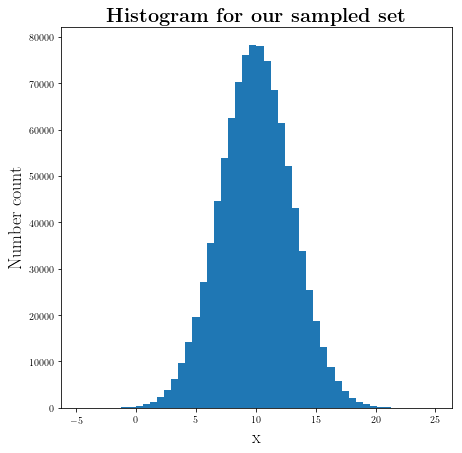

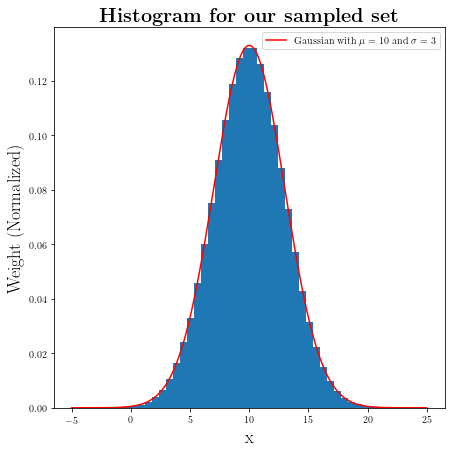

In [83]:
plt.subplots(1,1, figsize=(7,7))
plt.hist(our_pool, histtype="bar", bins=50)

plt.title(r"\textbf{Histogram for our sampled set}", fontsize=20)

plt.ylabel(r"Number count", fontsize=18)
plt.xlabel(r"x", fontsize=18)

###
x_span = np.linspace(-5,25, 10000)
y_gaussian = [Gaussian(x, mu, sigma) for x in x_span]


plt.subplots(1,1, figsize=(7,7))
a = plt.hist(our_pool, histtype="bar", density=True, bins=50)


plt.plot(x_span, y_gaussian, 'r', label=r"Gaussian with $\mu={}$ and $\sigma={}$".format(mu, sigma))


plt.title(r"\textbf{Histogram for our sampled set}", fontsize=20)

plt.ylabel(r"Weight (Normalized)", fontsize=18)
plt.xlabel(r"x", fontsize=18)

plt.legend(fontsize=10)

plt.show()


Which as you can see is fairly close to the Normal distribution. 

### How many of these points fall inside $[\mu-\sigma, \mu+\sigma]$?

In [90]:
points_inside = our_pool[our_pool<=mu+sigma]
points_inside = points_inside[points_inside>=mu-sigma]

In [93]:
print(r"Fraction of points inside [μ-σ, μ+σ] is:", len(points_inside)/number_of_points)

Fraction of points inside [μ-σ, μ+σ] is: 0.682086


### What about $[\mu-2\sigma, \mu+2\sigma]$?

In [94]:
points_inside = our_pool[our_pool<=mu+2*sigma]
points_inside = points_inside[points_inside>=mu-2*sigma]

In [95]:
print(r"Fraction of points inside [μ-2σ, μ+2σ] is:", len(points_inside)/number_of_points)

Fraction of points inside [μ-2σ, μ+2σ] is: 0.954267


As we saw in the examples above about 68% of the points sampled from a gaussian distributions fall within 1 $\sigma$ of the mean ($\mu$) and about 95% fall within the $2\sigma$.

In [100]:
def pdf(x, x_range=[-1,1]):
    x_0 = min(x_range)
    x_1 = max(x_range)
    
    if x>=x_0 and  x < x_1:
        return 1/(x_1-x_0)
    else:
        return 0

In [105]:
span_X = np.linspace(-3,3,1000)
span_Y = np.array([pdf(x) for x in span_X])

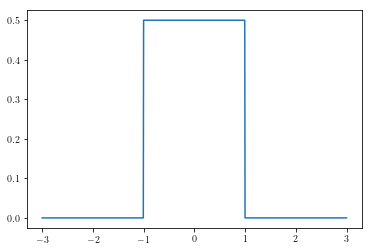

In [106]:
plt.plot(span_X, span_Y)
plt.show()

In [116]:
def integrate(f, x0, x1, num=10**6):
    _range_ = np.linspace(x0, x1, num)
    _fun_val = np.array([f(x) for x in _range_])
    _sum_ = 0
    for i in range(num-1):
        y1 = _fun_val[i]
        y2 = _fun_val[i+1]
        
        y = (y1 + y2)/2
        _sum_+=y*((x1-x0)/num)
    return _sum_


def cdf_finder(f, x_range):
    def cdf(x):
        return integrate(f, min(x_range), x)
    return cdf

In [131]:
my_cdf = cdf_finder(pdf, [-3,3])

In [132]:
y=[my_cdf(x) for x in np.linspace(-2,2, 100)] 

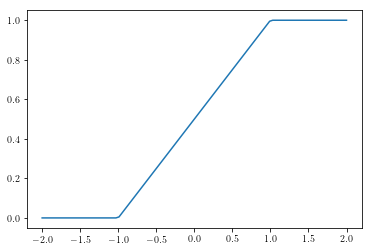

In [133]:
plt.plot(np.linspace(-2,2, 100), y)

### Let's use another useful library: [scipy]() 

In [183]:
import scipy.integrate as integral

In [179]:
def find_confidence(number_of_trials=1, list_of_deviations=[1, 2, 3]):
    for i in range(number_of_trials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
   
        print("μ =", mu, "σ =", sigma, "\n")
        
        for j in list_of_deviations:
            _integral_, _integral_err = integral.quad(Gaussian, mu-j*sigma, 
                                                      mu+j*sigma, (mu, sigma))
            print("Fraction of points within {} σ is :".format(j), round(_integral_,7))
            print("Error in our estimation: ", _integral_err)
            print("\n")

In [180]:
find_confidence()

μ = -4 σ = 6 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402476e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.840354865397235e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14




In [182]:
find_confidence(2,[1,2,3,4,5])

μ = 4 σ = 10 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402474e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.8403563407027505e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14


Fraction of points within 4 σ is : 0.9999367
Error in our estimation:  4.838912690680042e-12


Fraction of points within 5 σ is : 0.9999994
Error in our estimation:  8.668320505833549e-10


μ = -8 σ = 6 

Fraction of points within 1 σ is : 0.6826895
Error in our estimation:  7.579375928402476e-15


Fraction of points within 2 σ is : 0.9544997
Error in our estimation:  1.840354865397235e-11


Fraction of points within 3 σ is : 0.9973002
Error in our estimation:  1.1072256503105314e-14


Fraction of points within 4 σ is : 0.9999367
Error in our estimation:  4.838904125482879e-12


Fraction of points within 5 σ is : 0.9999994
Error in our estimation:  8.668320228277793e-10




In [367]:
def find_x(pdf, _y_, _range_):
    from scipy import optimize    
    def f(x):
        return pdf(x)-_y_
    f = np.vectorize(f)
    x_range = optimize.root(f, _range_)
    x_range = x_range.x
    try:
        return x_range[0], x_range[1]
    except IndexError:
        return x_range[0], x_range[0]
    
def confidence(pdf, fraction, precision, _range_):
    num = 10000
    _x_span = np.linspace(min(_range_), max(_range_), num)
    _y_span = np.vectorize(pdf)(_x_span)
    _y_ = max(_y_span)
    
    _y_copy = _y_
    
    step = min([1e-4, precision])
    
    _integral_ = 0
    error_=[]
    while abs(_integral_-fraction)>=precision:
        _y_ -= step
        x0, x1 = find_x(pdf, _y_, _range_)
        _integral_, err = integral.quad(pdf, x0, x1)
        error_.append(abs(_integral_-fraction))
        assert _y_>=0        
        
    return (x0, x1), _integral_, error_

In [371]:
def Normal(x):
    return Gaussian(x,100,2)

In [372]:
x0, _integ_, _err_= confidence(Normal, 0.95, 0.001, [95,105])

In [373]:
x0 

(96.09564867116791, 103.90435132882638)

In [460]:
def generic_pdf(x):
    return x*(1-x)

def normalized(x):
    n, _ = integral.quad(generic_pdf, 0, 1)
    return generic_pdf(x)/n

In [462]:
_x0_, intg, _er = confidence(normalized, 0.68, 0.001, [0,1])

In [463]:
_x0_

(0.2537277878234768, 0.7462722122178391)

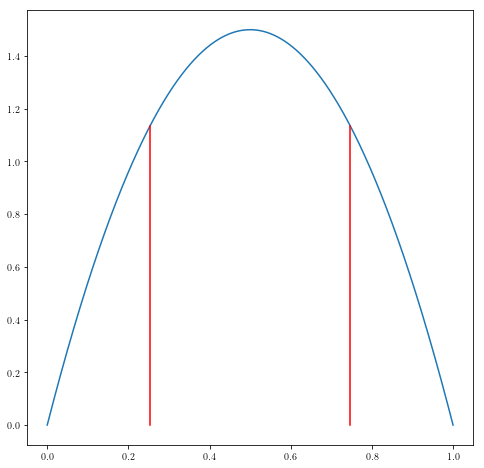

In [473]:
figure = plt.figure(figsize=(8,8))

_X_ = np.linspace(0, 1, 1000)



plt.plot(_X_, normalized(_X_))
plt.plot(_x0_[0]*np.ones(100), np.linspace(0, normalized(_x0_[0]), 100), 'r')
plt.plot(_x0_[1]*np.ones(100), np.linspace(0, normalized(_x0_[1]), 100), 'r')

# Finding the best fit for the line:



In [424]:
_a_ = 1
_b_ = 0

x_data = np.arange(1, 10, 1)
y_data = np.array([_a_*x+_b_+ random.gauss(0, 0.5) for x in x_data])

Text(0.5, 0, 'x')

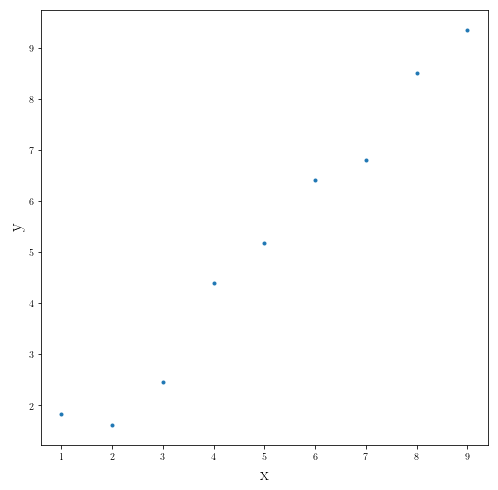

In [425]:
fig = plt.figure(figsize=(8,8))
plt.plot(x_data, y_data, ".")

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


### What is our model?

$$
\begin{equation*}
y = f(x) = \alpha x + \beta
\end{equation*}
$$

In [426]:
num = 100

α_span = np.tan(np.linspace(0, np.pi/2, 100))
β_span = np.linspace(-3, 3, 100)

In [427]:
def least_squared(data, prediction):
    diff = (data-prediction)**2
    return sum(diff)

In [428]:
_matrix_err_ = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        prediction = α_span[i]*x_data+β_span[j]
        _matrix_err_[i][j] = least_squared(y_data, prediction)

In [429]:
ij_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate = (α_span[ij_min[0]], β_span[ij_min[1]])

In [430]:
our_best_estimate

(array([1.01599385]), array([0.09090909]))

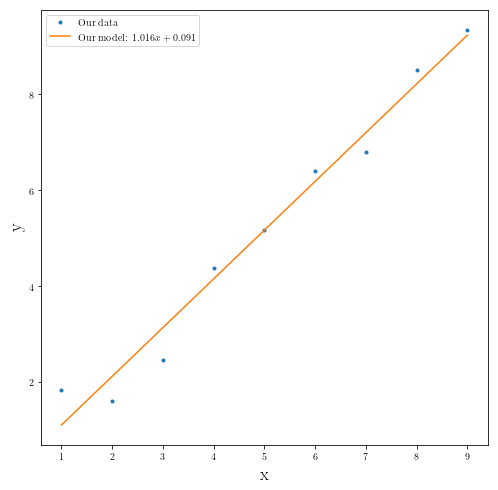

In [431]:
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")
plt.plot(x_data, our_best_estimate[0]*x_data+our_best_estimate[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate[0]),3),
                                            round(float(our_best_estimate[1]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend()
plt.show()

In [432]:
_a_ = 1
_b_ = 2
_c_ = 3


x_data = np.arange(1, 10, 1)
y_data = np.array([_a_*x**2+_b_*x+_c_+ random.gauss(0, 0.5) for x in x_data])

Text(0.5, 0, 'x')

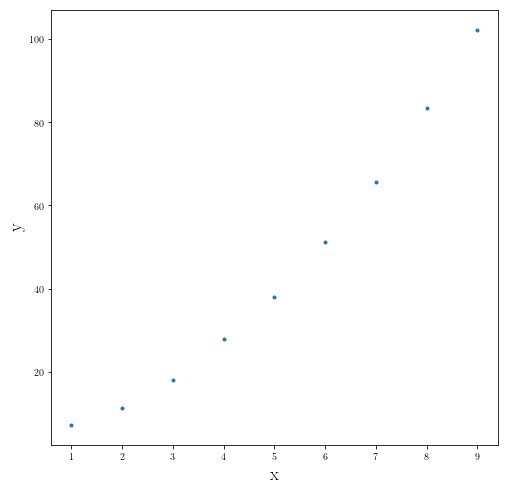

In [433]:
fig = plt.figure(figsize=(8,8))
plt.plot(x_data, y_data, ".")

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


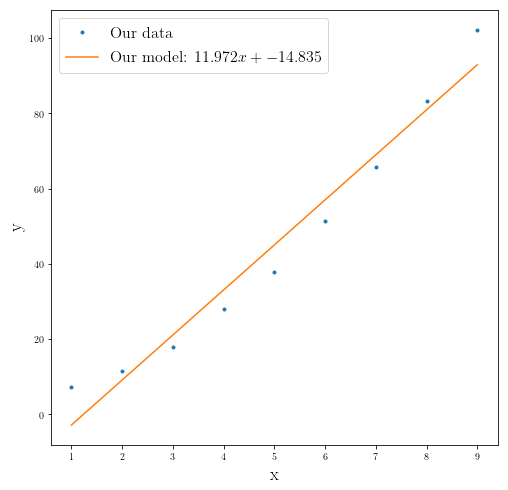

In [454]:
num = 1000

α_span = np.tan(np.linspace(0, np.pi/2, 1000))
β_span = np.linspace(-20, 20, 1000)

_matrix_err_ = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        prediction = α_span[i]*x_data+β_span[j]
        _matrix_err_[i][j] = least_squared(y_data, prediction)
        
        
ij_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate_linear = (α_span[ij_min[0]], β_span[ij_min[1]])

########
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")
plt.plot(x_data, our_best_estimate_linear[0]*x_data+our_best_estimate_linear[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate_linear[0]),3),
                                            round(float(our_best_estimate_linear[1]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend(fontsize=16)
plt.show()

In [445]:
num = 100

α_span = np.linspace(0, 3, num)
β_span = np.linspace(-3, 3, num)
γ_span = np.linspace(0, 5, num)

_matrix_err_ = np.zeros((num, num, num))

for i in range(num):
    for j in range(num):
        for k in range(num):
            prediction = α_span[i]*x_data**2 + β_span[j]*x_data + γ_span[k]
            _matrix_err_[i][j][k] = least_squared(y_data, prediction)
        
        
ijk_min = np.where(_matrix_err_ == _matrix_err_.min())

our_best_estimate = (α_span[ijk_min[0]], β_span[ijk_min[1]], γ_span[ijk_min[2]])


In [446]:
our_best_estimate

(array([1.03030303]), array([1.60606061]), array([4.34343434]))

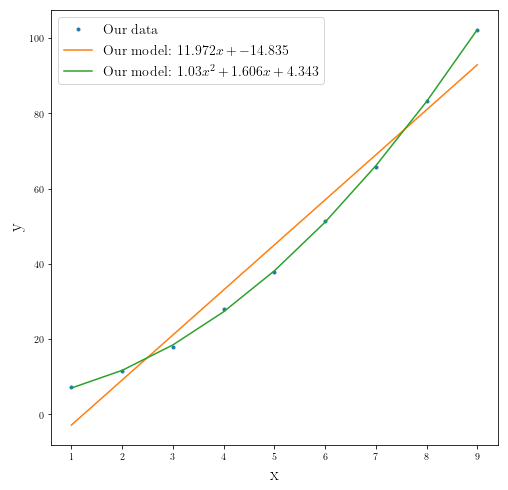

In [453]:
fig2 = plt.figure(figsize=(8,8))

plt.plot(x_data, y_data, ".", label="Our data")

plt.plot(x_data, our_best_estimate_linear[0]*x_data+our_best_estimate_linear[1], 
         label="Our model: ${}x+{}$".format(round(float(our_best_estimate_linear[0]),3),
                                            round(float(our_best_estimate_linear[1]), 3)))

plt.plot(x_data, our_best_estimate[0]*x_data**2+our_best_estimate[1]*x_data+our_best_estimate[2], 
         label="Our model: ${}x^2+{}x+{}$".format(round(float(our_best_estimate[0]),3),
                                            round(float(our_best_estimate[1]), 3),
                                            round(float(our_best_estimate[2]), 3)))

plt.ylabel(r"y", fontsize=18)
plt.xlabel(r"x", fontsize=18)


plt.legend(fontsize=14)
plt.show()

### Using `numpy.polyfit(x, y, deg)` built-in function: 

In [451]:
np.polyfit(x_data, y_data, deg=1)

array([ 11.91101413, -14.54028658])

In [452]:
np.polyfit(x_data, y_data, deg=2)

array([1.03105414, 1.60047278, 4.36237257])